# PT03 - Introduction to Machine Learning

**AI Bootcamp - Instinct Institute**

**Author:** MORK Mongkul

## Ex1: 

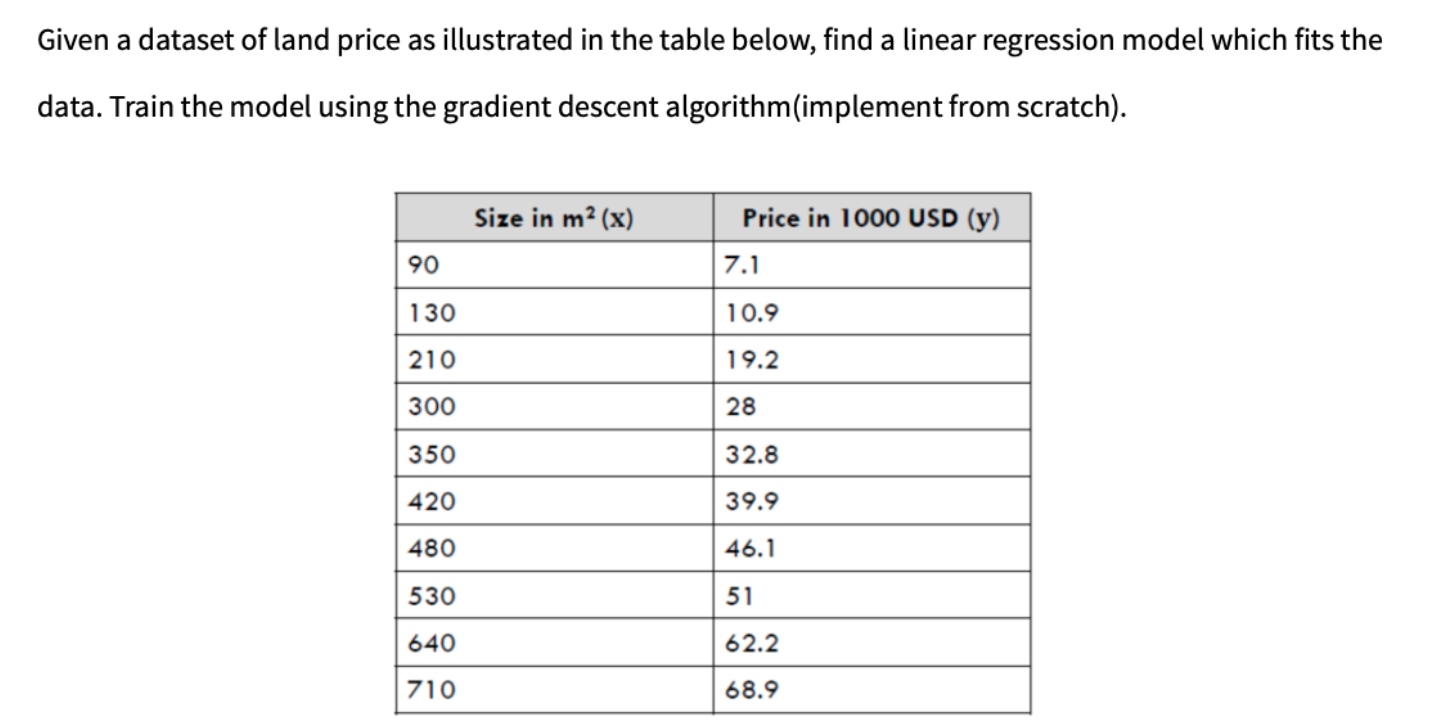

In [13]:
# data
x = [90, 130, 210, 300, 350, 420, 480, 530, 640, 710]
y = [7.1, 10.9, 19.2, 28, 32.8, 39.9, 46.1, 51, 62.2, 68.9]

In [14]:
import numpy as np 

X = np.array(x)
y = np.array(y)


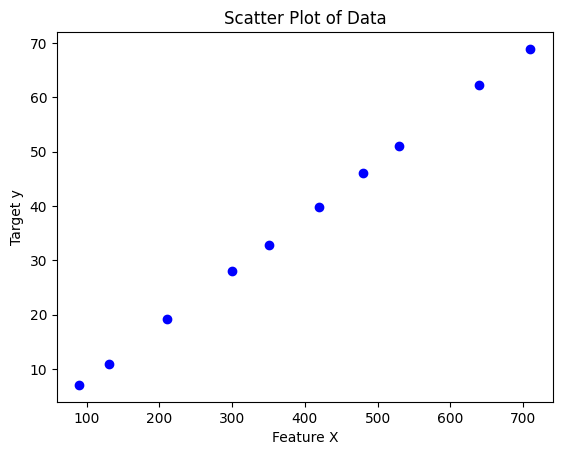

In [15]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, color='blue')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Scatter Plot of Data')
plt.show()

In [16]:
#hypotheis fucntion 
def hyp(x, a,b):
    y  = a*x + b
    return y

#cost function
def cost_function(y_predtict, y_actual):
    c = (y_predtict - y_actual)**2
    c = c.mean()
    return c
#gradient descent
def grad_a(x, y_predict, y_actual):
    g_a = (y_predict - y_actual)*x
    g_a = 2*g_a.mean()
    return g_a

def grad_b(y_predict, y_actual):
    g_b = (y_predict - y_actual)
    g_b = 2*g_b.mean()
    return g_b

In [17]:
#Training the model
a = 0 
b = 0
alpha = 0.000001
losses = []

for epoch in range(1, 201):
    y_predict = hyp(X, a,b)
    cost = cost_function(y_predict, y)
    losses.append(cost)

    #update parameters
    a = a - alpha*grad_a(X, y_predict, y)
    b = b - alpha*grad_b(y_predict, y)

    print(f"Epoch {epoch}: Cost={cost:.4f}, a={a:.4f}, b={b:.4f}")

Epoch 1: Cost=1733.1970, a=0.0361, b=0.0001
Epoch 2: Cost=674.0767, a=0.0586, b=0.0001
Epoch 3: Cost=262.4754, a=0.0727, b=0.0001
Epoch 4: Cost=102.5167, a=0.0814, b=0.0002
Epoch 5: Cost=40.3526, a=0.0869, b=0.0002
Epoch 6: Cost=16.1940, a=0.0903, b=0.0002
Epoch 7: Cost=6.8054, a=0.0924, b=0.0002
Epoch 8: Cost=3.1568, a=0.0937, b=0.0002
Epoch 9: Cost=1.7388, a=0.0946, b=0.0002
Epoch 10: Cost=1.1877, a=0.0951, b=0.0002
Epoch 11: Cost=0.9736, a=0.0954, b=0.0002
Epoch 12: Cost=0.8903, a=0.0956, b=0.0002
Epoch 13: Cost=0.8580, a=0.0957, b=0.0002
Epoch 14: Cost=0.8454, a=0.0958, b=0.0002
Epoch 15: Cost=0.8405, a=0.0958, b=0.0002
Epoch 16: Cost=0.8387, a=0.0959, b=0.0002
Epoch 17: Cost=0.8379, a=0.0959, b=0.0002
Epoch 18: Cost=0.8376, a=0.0959, b=0.0002
Epoch 19: Cost=0.8375, a=0.0959, b=0.0002
Epoch 20: Cost=0.8375, a=0.0959, b=0.0002
Epoch 21: Cost=0.8375, a=0.0959, b=0.0002
Epoch 22: Cost=0.8374, a=0.0959, b=0.0002
Epoch 23: Cost=0.8374, a=0.0959, b=0.0002
Epoch 24: Cost=0.8374, a=0.0959,

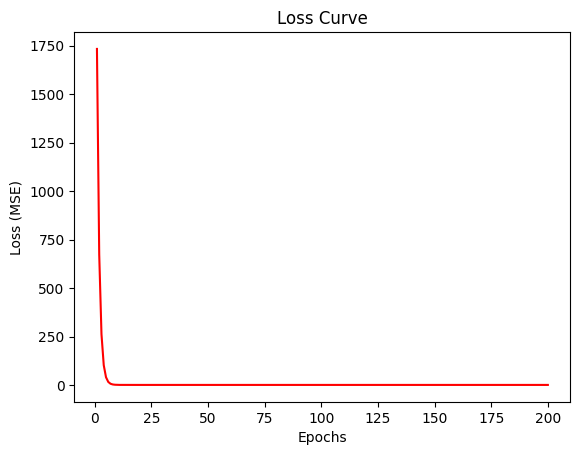

In [18]:
plt.plot(range(1, 201), losses, color='red')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

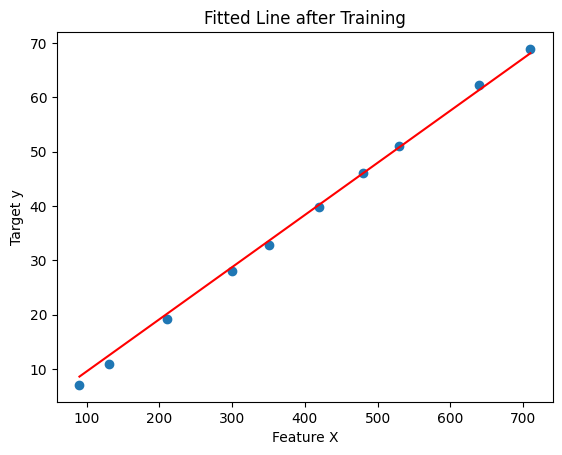

In [19]:
#fitted line
plt.scatter(x,y)
plt.plot(x, hyp(X, a,b), color='red')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Fitted Line after Training')
plt.show()

## scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_pred = model.predict(X.reshape(-1, 1))

In [11]:
print(f" Slop a : {model.coef_[0]:.4f}, Intercept b : {model.intercept_:.4f}")

 Slop a : 0.1000, Intercept b : -1.9825


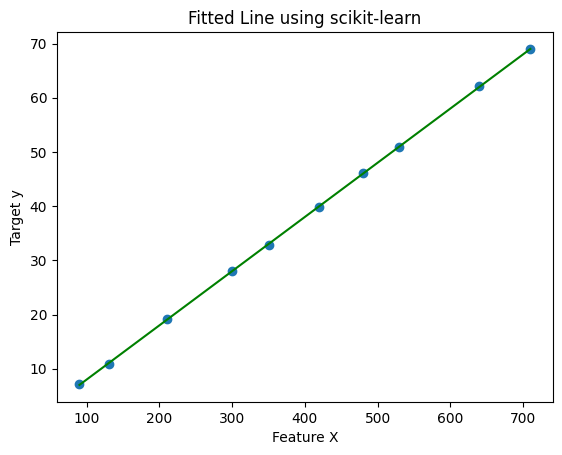

In [12]:
#plot 
plt.scatter(x,y)
plt.plot(x, y_pred, color='green')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Fitted Line using scikit-learn')
plt.show()

# Exercise 1

Build a linear regression which predicts the land price using both the `land_area` and the `distance_to_city` features. (See the dataset in `land_price_1.csv`)


In [ ]:
# To Do 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [24]:
df = pd.read_csv('land_price_1 .csv')
df.head()

,land_area,dist_to_city,price
0,122,12.9,15.7
1,173,18.4,11.3
2,341,11.0,42.0
3,439,19.3,35.0
4,477,19.7,37.7


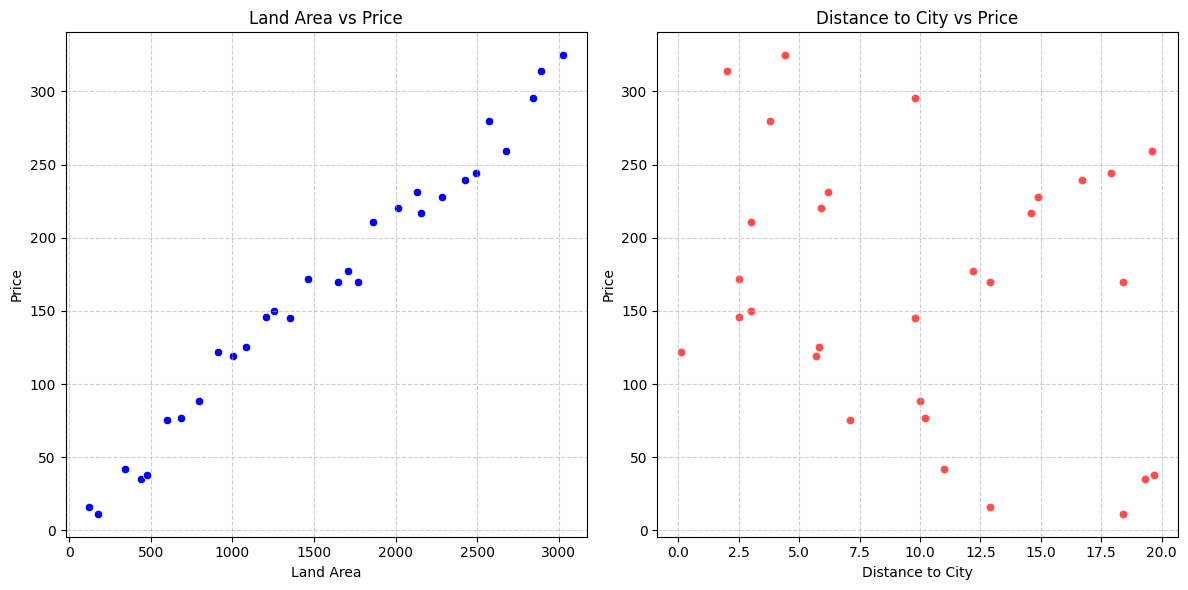

In [25]:
fig , axes = plt.subplots(1,2, figsize=(12,6))

#1.Land area
sns.scatterplot(ax=axes[0], data = df, x = 'land_area' , y = 'price' , color = 'blue')
axes[0].set_title('Land Area vs Price')
axes[0].set_xlabel('Land Area')
axes[0].set_ylabel('Price')
axes[0].grid(True, linestyle='--', alpha=0.6)

#2. distance to city
sns.scatterplot(ax=axes[1], data=df, x='dist_to_city', y='price', color='red', alpha=0.7)
axes[1].set_title('Distance to City vs Price')
axes[1].set_xlabel('Distance to City')
axes[1].set_ylabel('Price')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

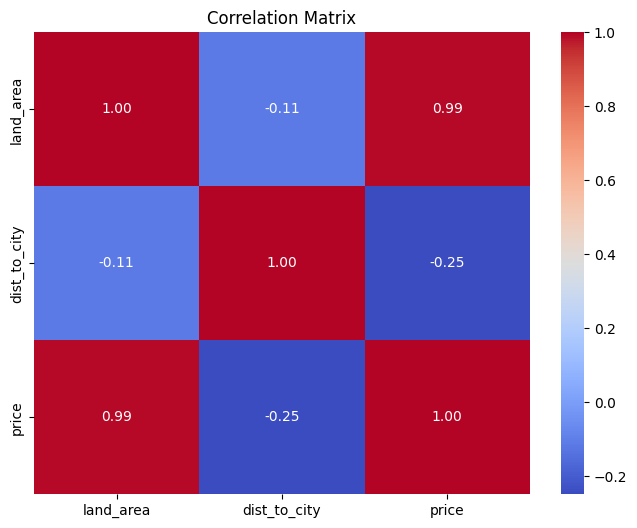

In [26]:
#correlation matrix 
plt.clf()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
x1_raw = df['land_area']
x2_raw = df['dist_to_city']

x1_mean, x1_std = x1_raw.mean(), x1_raw.std()
x2_mean, x2_std = x2_raw.mean(), x2_raw.std()

x1 = (x1_raw - x1_mean) / x1_std
x2 = (x2_raw - x2_mean) / x2_std

In [28]:
x1.shape, x2.shape

((30,), (30,))

In [29]:
x1

0    -1.618635
1    -1.560702
2    -1.369864
3    -1.258543
4    -1.215377
5    -1.079065
6    -0.982510
7    -0.855285
8    -0.721244
9    -0.620146
10   -0.529271
11   -0.390687
12   -0.331618
13   -0.218024
14   -0.093071
15    0.117077
16    0.181826
17    0.251118
18    0.359032
19    0.531694
20    0.665735
21    0.694133
22    0.834990
23    0.995157
24    1.078080
25    1.167819
26    1.285957
27    1.475658
28    1.525639
29    1.680127
Name: land_area, dtype: float64

In [30]:
x2

0     0.467716
1     1.357834
2     0.160221
3     1.503489
4     1.568225
5    -0.470953
6     0.030750
7    -0.001618
8    -1.603830
9    -0.697528
10   -0.681344
11   -1.215415
12   -1.134495
13   -0.033986
14   -1.215415
15    0.467716
16    0.354429
17    1.357834
18   -1.134495
19   -0.665160
20   -0.616609
21    0.742843
22    0.791395
23    1.082706
24    1.276914
25   -1.005023
26    1.552041
27   -0.033986
28   -1.296335
29   -0.907920
Name: dist_to_city, dtype: float64

In [31]:
#x1 = df['land_area'].values
#x2 = df['dist_to_city'].values
#y = df['price'].values

# Linear Regression Model(Maths Intuition)

Let the training dataset be:  
$$
\{(x_1^{(i)}, x_2^{(i)}, y^{(i)})\}_{i=1}^{n}
$$

**Hypothesis (Prediction):**  
$$
\hat{y}^{(i)} = w_1 x_1^{(i)} + w_2 x_2^{(i)} + b
$$
$$
\hat{\mathbf{y}} = w_1 \mathbf{x}_1 + w_2 \mathbf{x}_2 + b
$$

**Cost Function (Mean Squared Error):**  
$$
J(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2
$$

**Gradients:**  
$$
\frac{\partial J}{\partial w_1} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) x_1^{(i)}
$$
$$
\frac{\partial J}{\partial w_2} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) x_2^{(i)}
$$
$$
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})
$$


In [32]:
#hypothesis function
def hyp(w1, w2, b, x1, x2):
    return (w1 * x1) + (w2 * x2) + b

def cost_function(y_pred, y_actual):
    # Mean Squared Error
    return np.mean((y_pred - y_actual)**2)

# Gradients
def grad_w1(x1, y_pred, y_actual):
    return 2 * np.mean((y_pred - y_actual) * x1)

def grad_w2(x2, y_pred, y_actual):
    return 2 * np.mean((y_pred - y_actual) * x2)

def grad_b(y_pred, y_actual):
    return 2 * np.mean(y_pred - y_actual)

In [33]:
#Initialize variables
w1, w2, b = 0, 0, 0
learning_rate = 0.001
epochs = 5000
losses = []

#Training Loop
for epoch in range(epochs):
    # Calculate prediction
    y_pred = hyp(w1, w2, b, x1, x2)
    
    # Calculate cost
    cost = cost_function(y_pred, df['price'])
    losses.append(cost)

    if epoch % 500 == 0:
    
        print(f"Epoch {epoch}: Cost={cost:.4f}, w1={w1:.4f}, w2={w2:.4f}, b={b:.4f}")
    
    # Calculate gradients
    gw1 = grad_w1(x1, y_pred, df['price'])
    gw2 = grad_w2(x2, y_pred, df['price'])
    gb = grad_b(y_pred, df['price'])

    # Update parameters
    w1 -= learning_rate * gw1
    w2 -= learning_rate * gw2
    b  -= learning_rate * gb

print(f"\nFinal Result: y = ({w1:.4f})x1 + ({w2:.4f})x2 + {b:.4f}")

Epoch 0: Cost=35052.9207, w1=0.0000, w2=0.0000, b=0.0000
Epoch 500: Cost=4740.2702, w1=54.9967, w2=-11.3810, b=104.2046
Epoch 1000: Cost=648.3090, w1=75.5440, w2=-13.4207, b=142.5010
Epoch 1500: Cost=90.0563, w1=83.3136, w2=-13.3369, b=156.5754
Epoch 2000: Cost=12.9613, w1=86.2875, w2=-12.9783, b=161.7478
Epoch 2500: Cost=2.1632, w1=87.4395, w2=-12.7162, b=163.6488
Epoch 3000: Cost=0.6262, w1=87.8909, w2=-12.5676, b=164.3474
Epoch 3500: Cost=0.4033, w1=88.0697, w2=-12.4919, b=164.6041
Epoch 4000: Cost=0.3704, w1=88.1413, w2=-12.4554, b=164.6985
Epoch 4500: Cost=0.3654, w1=88.1702, w2=-12.4384, b=164.7332

Final Result: y = (88.1819)x1 + (-12.4307)x2 + 164.7459


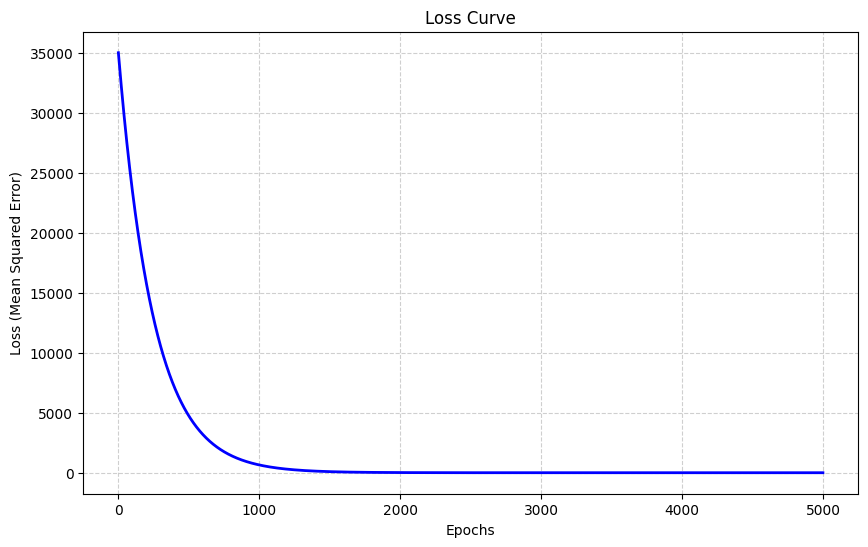

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(losses, color='blue', linewidth=2)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [35]:
import plotly.graph_objects as go

# Scatter points (actual data)
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Actual Data'
)

# Grid for plane
x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30)
)

y_pred_grid = w1 * x1_grid + w2 * x2_grid + b

# Regression plane
plane = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred_grid,
    opacity=0.5,
    showscale=False,
    name='Regression Plane'
)

# Figure
fig = go.Figure(data=[scatter, plane])

fig.update_layout(
    title='Multiple variable Linear Regression(Price Prediction)',
    scene=dict(
        xaxis_title='x1 (Land Area)',
        yaxis_title='x2 (Distance to City)',
        zaxis_title='Price'
    ),
    width=800,
    height=600
)

fig.show()


In [13]:
#Evaluate the model
Mean_Squared_Error = cost_function(hyp(w1, w2, b, x1, x2), df['price'])
print(f"Mean Squared Error on Training Data: {Mean_Squared_Error:.4f}")

Mean Squared Error on Training Data: 0.3646


In [14]:
R2_score = 1 - (Mean_Squared_Error / np.var(df['price']))
print(f"R² Score on Training Data: {R2_score:.4f}")

R² Score on Training Data: 1.0000


## Scikit-Learn

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [16]:
X = df[['land_area', 'dist_to_city']]
y = df['price']

In [17]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape

(30, 2)

In [18]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [19]:
print(f" Coefficients : {model.coef_}, Intercept : {model.intercept_:.4f}")

 Coefficients : [ 86.70784549 -12.21575569], Intercept : 164.7533


In [ ]:
# Scatter points (actual data)
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Actual Data'
)

# Grid for plane
x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30)
)

y_pred_grid = w1 * x1_grid + w2 * x2_grid + b

# Regression plane
plane = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred_grid,
    opacity=0.5,
    showscale=False,
    name='Regression Plane'
)

# Figure
fig = go.Figure(data=[scatter, plane])

fig.update_layout(
    title='Multiple variable Linear Regression(Price Prediction)',
    scene=dict(
        xaxis_title='x1 (Land Area)',
        yaxis_title='x2 (Distance to City)',
        zaxis_title='Price'
    ),
    width=800,
    height=600
)

fig.show()


# Exercise 2

Using only the distance feature, build a model with hypothesis $h(x) = \theta_{0}+\theta_{1}x+\theta_{3}\sqrt{x}$ to predict the `land_price`. (See the dataset in `land_price_2.csv`.)


In [43]:
#To Do
df = pd.read_csv('land_price_2.csv')
df.head()

,land_area,price
0,129,140.9
1,214,200.3
2,343,280.4
3,387,298.8
4,454,358.2


In [ ]:
x = df['land_area'].values
y = df['price'].values

x1 = x
x2 = np.sqrt(x)


In [48]:
#apply feature scaling
x1 = (x1 - x1.mean()) / x1.std()
x2 = (x2 - x2.mean()) / x2.std()

In [49]:
#hypothesis function
def hyp(w1, w2, b, x1, x2):
    return (w1 * x1) + (w2 * x2) + b

def cost_function(y_pred, y_actual):
    # Mean Squared Error
    return np.mean((y_pred - y_actual)**2)

# Gradients
def grad_w1(x1, y_pred, y_actual):
    return 2 * np.mean((y_pred - y_actual) * x1)

def grad_w2(x2, y_pred, y_actual):
    return 2 * np.mean((y_pred - y_actual) * x2)

def grad_b(y_pred, y_actual):
    return 2 * np.mean(y_pred - y_actual)

In [55]:
#Initialize variables
w1, w2, b = 0, 0, 0
learning_rate = 0.1
epochs = 10000
losses = []

#Training Loop
for epoch in range(epochs):
    # Calculate prediction
    y_pred = hyp(w1, w2, b, x1, x2)
    
    # Calculate cost
    cost = cost_function(y_pred, y)
    losses.append(cost)

    if epoch % 500 == 0:
    
        print(f"Epoch {epoch}: Cost={cost:.4f}, w1={w1:.4f}, w2={w2:.4f}, b={b:.4f}")
    
    # Calculate gradients
    gw1 = grad_w1(x1, y_pred, y)
    gw2 = grad_w2(x2, y_pred, y)
    gb = grad_b(y_pred, y)

    # Update parameters
    w1 -= learning_rate * gw1
    w2 -= learning_rate * gw2
    b  -= learning_rate * gb

print(f"\nFinal Result: y = ({w1:.4f})x1 + ({w2:.4f})x2 + {b:.4f}")

Epoch 0: Cost=1199843.3720, w1=0.0000, w2=0.0000, b=0.0000
Epoch 500: Cost=93.6116, w1=391.9690, w2=102.6759, b=977.6533
Epoch 1000: Cost=33.4570, w1=428.0682, w2=66.5767, b=977.6533
Epoch 1500: Cost=29.7103, w1=437.0775, w2=57.5675, b=977.6533
Epoch 2000: Cost=29.4770, w1=439.3259, w2=55.3190, b=977.6533
Epoch 2500: Cost=29.4624, w1=439.8870, w2=54.7579, b=977.6533
Epoch 3000: Cost=29.4615, w1=440.0271, w2=54.6179, b=977.6533
Epoch 3500: Cost=29.4615, w1=440.0620, w2=54.5829, b=977.6533
Epoch 4000: Cost=29.4615, w1=440.0708, w2=54.5742, b=977.6533
Epoch 4500: Cost=29.4615, w1=440.0729, w2=54.5720, b=977.6533
Epoch 5000: Cost=29.4615, w1=440.0735, w2=54.5715, b=977.6533
Epoch 5500: Cost=29.4615, w1=440.0736, w2=54.5713, b=977.6533
Epoch 6000: Cost=29.4615, w1=440.0736, w2=54.5713, b=977.6533
Epoch 6500: Cost=29.4615, w1=440.0737, w2=54.5713, b=977.6533
Epoch 7000: Cost=29.4615, w1=440.0737, w2=54.5713, b=977.6533
Epoch 7500: Cost=29.4615, w1=440.0737, w2=54.5713, b=977.6533
Epoch 8000:

## Scikit-Learn

In [58]:
x = df['land_area'].values
y = df['price'].values

In [60]:
X = np.column_stack([
    x,              # x
    np.sqrt(x)      # sqrt(x)
])
X

array([[ 129.        ,   11.35781669],
       [ 214.        ,   14.62873884],
       [ 343.        ,   18.52025918],
       [ 387.        ,   19.67231557],
       [ 454.        ,   21.30727575],
       [ 565.        ,   23.76972865],
       [ 675.        ,   25.98076211],
       [ 798.        ,   28.24889378],
       [ 879.        ,   29.64793416],
       [1016.        ,   31.8747549 ],
       [1095.        ,   33.09078422],
       [1222.        ,   34.95711659],
       [1272.        ,   35.665109  ],
       [1429.        ,   37.80211634],
       [1467.        ,   38.301436  ],
       [1593.        ,   39.91240409],
       [1661.        ,   40.75536774],
       [1773.        ,   42.10700654],
       [1946.        ,   44.11349   ],
       [2046.        ,   45.23273151],
       [2115.        ,   45.98912915],
       [2235.        ,   47.27578661],
       [2337.        ,   48.34252786],
       [2391.        ,   48.89785271],
       [2516.        ,   50.15974482],
       [2564.        ,   

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.64114232, -2.11050412],
       [-1.54285417, -1.84509844],
       [-1.39368744, -1.52933684],
       [-1.34280887, -1.43585791],
       [-1.26533468, -1.30319571],
       [-1.13698192, -1.10338998],
       [-1.00978549, -0.92398466],
       [-0.86755675, -0.73994633],
       [-0.77389392, -0.62642689],
       [-0.61547655, -0.44574057],
       [-0.52412639, -0.34707082],
       [-0.37727232, -0.19563486],
       [-0.31945576, -0.1381877 ],
       [-0.13791177,  0.03521108],
       [-0.09397118,  0.07572634],
       [ 0.05172655,  0.2064418 ],
       [ 0.13035707,  0.27484066],
       [ 0.25986616,  0.38451389],
       [ 0.45991146,  0.54732184],
       [ 0.57554458,  0.63813814],
       [ 0.65533143,  0.69951295],
       [ 0.79409117,  0.80391354],
       [ 0.91203696,  0.89046993],
       [ 0.97447884,  0.9355295 ],
       [ 1.11902024,  1.03792061],
       [ 1.17452414,  1.0765608 ],
       [ 1.29593891,  1.15984465],
       [ 1.42544801,  1.24689444],
       [ 1.53414314,

In [64]:
model = LinearRegression()
model.fit(X_scaled, y)

w_1, w_3 = model.coef_
w_0 = model.intercept_

print("w0:", w_0)
print("w1:", w_1)
print("w3:", w_3)

w0: 977.6533333333332
w1: 440.0736584265021
w3: 54.57128825308084


## Ex1: 

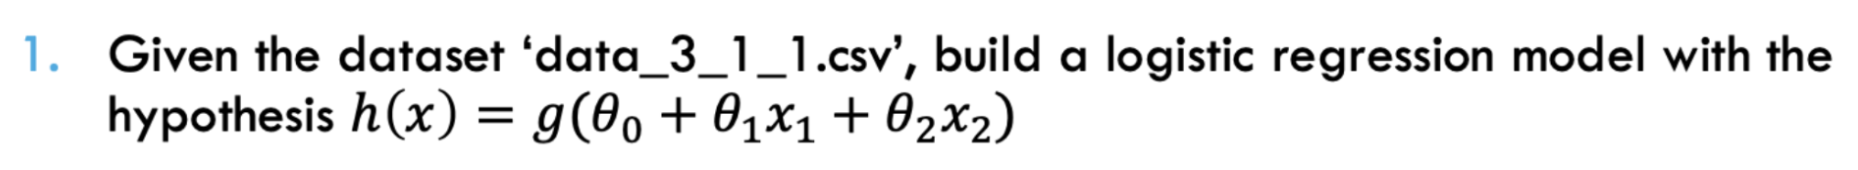

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# load data
df = pd.read_csv('data_3_1_1.csv')
df.head()

,x1,x2,class
0,6.70,6.79,1
1,6.92,3.87,1
2,7.87,5.36,1
3,2.93,6.91,0
4,6.67,4.92,1


In [22]:
df['class'].value_counts()

class
1    50
0    50
Name: count, dtype: int64

In [23]:
data_array = df.to_numpy()

In [24]:
#data_array.shape
x1 = data_array[:, 0]
x1_scaled = (x1 - x1.mean())/(x1.max()-x1.min())  #scale value to between 0 and 1 is needed because of gradient descent
x2 = data_array[:, 1]
x2_scaled = (x2 - x2.mean())/(x2.max()-x2.min())
y = data_array[:, 2]

In [25]:
x1, x1_scaled

(array([ 6.7 ,  6.92,  7.87,  2.93,  6.67,  5.65,  3.52,  4.56,  6.68,
         3.99,  6.75,  5.65,  3.45,  3.01,  2.44,  7.28,  5.93,  3.06,
         1.66,  3.53,  4.12,  3.99,  6.47,  6.22,  6.58,  3.22,  3.5 ,
         2.2 ,  2.9 ,  4.33,  6.97,  6.06,  1.62,  2.39,  3.02,  3.18,
         3.13,  6.96,  7.09,  5.47,  5.63,  4.26,  6.95,  2.58,  5.39,
         1.9 ,  5.61,  6.99,  7.86,  8.24,  2.71,  7.52,  4.56,  2.49,
         5.24,  2.16,  2.71,  1.62,  1.16,  4.44,  6.15,  6.75,  7.27,
         6.75,  3.08,  3.05,  6.22,  6.37,  7.4 ,  3.89,  4.22,  2.94,
         6.73,  6.85,  6.65,  7.06,  7.06,  1.58, -0.  ,  4.29,  7.23,
         7.41,  2.11,  1.86,  7.71,  7.38,  8.36,  5.76,  3.57,  5.62,
         3.26,  2.12,  6.63,  4.49,  4.02,  5.37,  2.74,  8.35,  7.17,
         2.82]),
 array([ 0.22011962,  0.24643541,  0.36007177, -0.23083732,  0.2165311 ,
         0.09452153, -0.16026316, -0.03586124,  0.21772727, -0.10404306,
         0.22610048,  0.09452153, -0.16863636, -0.221267

In [26]:
x2, x2_scaled

(array([6.79, 3.87, 5.36, 6.91, 4.92, 3.86, 7.09, 8.94, 4.84, 6.  , 5.45,
        5.9 , 7.03, 8.91, 8.49, 4.75, 4.39, 7.53, 4.77, 7.43, 4.91, 5.22,
        4.55, 4.12, 4.6 , 7.6 , 6.06, 7.53, 6.49, 4.87, 6.38, 2.55, 6.22,
        6.91, 6.31, 6.81, 7.48, 3.86, 4.78, 7.16, 4.66, 6.73, 6.06, 6.74,
        6.94, 8.78, 4.1 , 5.76, 5.03, 5.05, 6.88, 4.92, 6.87, 6.56, 3.69,
        8.55, 7.72, 7.3 , 8.48, 4.72, 5.5 , 5.88, 7.76, 4.72, 6.  , 6.88,
        4.42, 5.69, 4.1 , 6.73, 6.58, 7.93, 5.26, 5.56, 4.36, 5.24, 5.18,
        7.09, 6.64, 7.13, 2.94, 5.37, 9.74, 7.44, 3.97, 5.99, 4.57, 5.62,
        8.3 , 6.94, 8.33, 6.61, 5.26, 7.13, 7.45, 4.89, 6.76, 5.27, 4.34,
        7.02]),
 array([ 1.01849791e-01, -3.04269819e-01, -9.70375522e-02,  1.18539638e-01,
        -1.58233658e-01, -3.05660640e-01,  1.43574409e-01,  4.00876217e-01,
        -1.69360223e-01, -8.02503477e-03, -8.45201669e-02, -2.19332406e-02,
         1.35229485e-01,  3.96703755e-01,  3.38289291e-01, -1.81877608e-01,
        -2.319

In [27]:
y

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.])

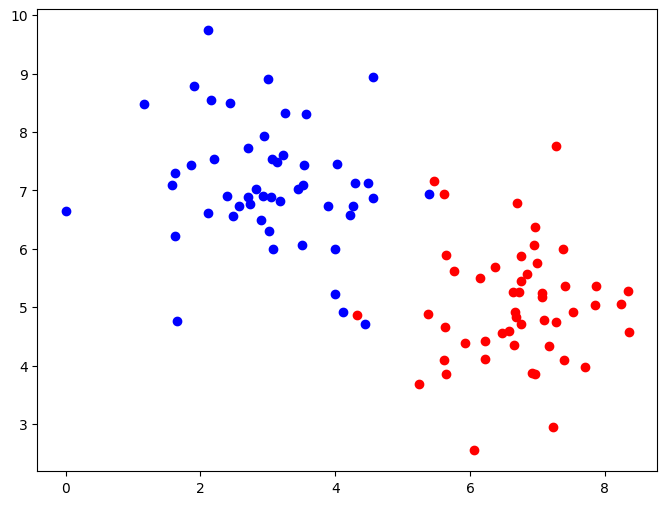

In [28]:
# plot
plt.figure(figsize=(8,6))
plt.scatter(x1[y==0], x2[y==0], color='blue')
plt.scatter(x1[y==1], x2[y==1], color='red')
plt.show()

In [29]:
y = y.reshape(-1,1)

In [30]:
X = np.concatenate((np.ones((len(x1),1)), x1_scaled.reshape(-1,1), x2_scaled.reshape(-1,1)), axis=1)
X[:5]

array([[ 1.        ,  0.22011962,  0.10184979],
       [ 1.        ,  0.24643541, -0.30426982],
       [ 1.        ,  0.36007177, -0.09703755],
       [ 1.        , -0.23083732,  0.11853964],
       [ 1.        ,  0.2165311 , -0.15823366]])

# Logistics Regression-Binary Classification (maths intuition)

Let the training dataset be:  
$$
\{ (\mathbf{x}^{(i)}, y^{(i)}) \}_{i=1}^{n}, \quad
\mathbf{x}^{(i)} \in \mathbb{R}^m, \; y^{(i)} \in \{0,1\}
$$

**Sigmoid Function:**  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

**Hypothesis Function:**  
$$
\hat{\mathbf{y}} = h_\theta(X) = \sigma(X \theta)
$$

**Cost Function (Log Loss / Binary Cross-Entropy):**  
$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n} \Big[ - y^{(i)} \log(\hat{y}^{(i)}) - (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]
$$

**Gradient of the Cost Function:**  
$$
\nabla_\theta J(\theta) = \frac{1}{n} X^\top (\hat{\mathbf{y}} - \mathbf{y})
$$

**Gradient Descent Update:**  
$$
\theta \leftarrow \theta - \alpha \nabla_\theta J(\theta)
$$

In [31]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

def hyp(X, theta):
  z = np.matmul(X, theta)
  h = sigmoid(z)
  return h

def cost_func(X, theta, y):
  h = hyp(X, theta)
  cost = -y*np.log(h) - (1-y)*np.log(1-h)
  cost = cost.mean()
  return cost

def grad(X, theta, y):
  h = hyp(X, theta)
  g = np.matmul(X.transpose(), h-y)
  g = g/len(X)
  return g

In [32]:
# training
theta = np.zeros((3, 1), dtype=float)
alpha = 0.1

for iter in range(100000):
  cost = cost_func(X, theta, y)
  g = grad(X, theta, y)

  theta = theta - alpha * g

  if iter%1000 == 0:
    print(f"iter: {iter}, cost = {cost}")

iter: 0, cost = 0.6931471805599453
iter: 1000, cost = 0.216541236608369
iter: 2000, cost = 0.15010234141671783
iter: 3000, cost = 0.12293190114237121
iter: 4000, cost = 0.10768805285900196
iter: 5000, cost = 0.09773081144466532
iter: 6000, cost = 0.09061788682032774
iter: 7000, cost = 0.08522911178830322
iter: 8000, cost = 0.08097377060282264
iter: 9000, cost = 0.07750864575989831
iter: 10000, cost = 0.07461954598235149
iter: 11000, cost = 0.0721652481044066
iter: 12000, cost = 0.07004848842560912
iter: 13000, cost = 0.06819986164243938
iter: 14000, cost = 0.06656836468459597
iter: 15000, cost = 0.06511557843029472
iter: 16000, cost = 0.06381194515716053
iter: 17000, cost = 0.06263430629467481
iter: 18000, cost = 0.06156422641700671
iter: 19000, cost = 0.06058682355986369
iter: 20000, cost = 0.059689934776922
iter: 21000, cost = 0.05886350915823647
iter: 22000, cost = 0.05809915857463262
iter: 23000, cost = 0.057389819939308744
iter: 24000, cost = 0.05672949770720768
iter: 25000, cost 

In [33]:
theta0 = theta[0, 0]   # intercept
theta1 = theta[1, 0]   # coefficient for x1
theta2 = theta[2, 0]   # coefficient for x2

print(f"Intercept (θ0): {theta0}")
print(f"Coefficient for x1 (θ1): {theta1}")
print(f"Coefficient for x2 (θ2): {theta2}")


Intercept (θ0): -0.39789258863906257
Coefficient for x1 (θ1): 28.90495337204588
Coefficient for x2 (θ2): -9.173661340400765


In [34]:
# Evaluate
# set the value of threshold
threshold = 0.5

# value of parameter found by the gradient descent
print(f'theta = {theta}')

# output value of input variable
h = hyp(X, theta)

# prediction values
pred = []
for value in h:
  if value >= 0.5:
    pred.append(1)
  else:
    pred.append(0)

# compare prediciton and target
for i in range(len(y)):
  print(f'prediction = {pred[i]}, actual= {y[i,0]}')

# calculate acuracy
num_correct = len([i for i in range(len(y)) if pred[i]==y[i,0]])
rate = (num_correct/len(y))*100
print(f'Acuracy = {rate}%')

theta = [[-0.39789259]
 [28.90495337]
 [-9.17366134]]
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 1.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual

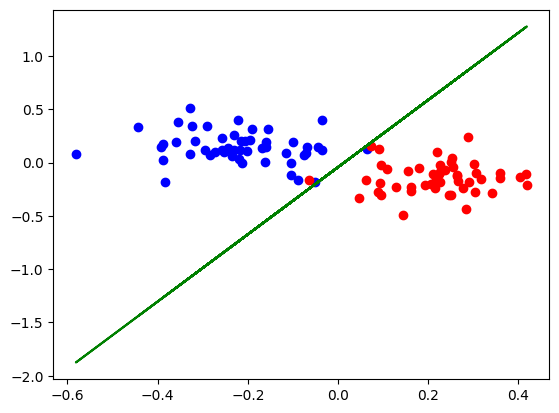

In [35]:
# Plot boundary line
y = data_array[:, 2]
plt.scatter(x1_scaled[y==0], x2_scaled[y==0], color='blue')
plt.scatter(x1_scaled[y==1], x2_scaled[y==1], color='red')
x2_new = (1/theta[2])*(-theta[1]*x1_scaled - theta[0])
plt.plot(x1_scaled, x2_new, color = 'green')
plt.show()

## scikit-learn

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [37]:
df = pd.read_csv('data_3_1_1.csv')
df.head()

,x1,x2,class
0,6.70,6.79,1
1,6.92,3.87,1
2,7.87,5.36,1
3,2.93,6.91,0
4,6.67,4.92,1


In [38]:
#select features and target
X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

In [39]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.89427341,  0.50441425],
       [ 1.00118579, -1.50690571],
       [ 1.46285286, -0.48058148],
       [-0.93781591,  0.58707123],
       [ 0.87969445, -0.78365709]])

In [40]:
model = LogisticRegression(
    C=np.inf,       # match your no-regularization setup
    solver='lbfgs',     # lbfgs solver works well for small datasets
    max_iter=10000
)

model.fit(X_scaled, y)


/Users/macbookair/Documents/Instinct Institute_PT-LAB/ai_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1170: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",inf
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [41]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-0.60905927]
Coefficients: [[12.31620378 -3.51806807]]


In [42]:
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy * 100, "%")


Accuracy: 97.0 %


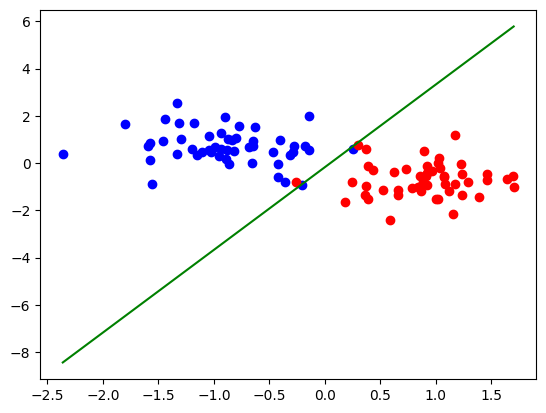

In [43]:
#desicion boundary plot
theta0 = model.intercept_[0]
theta1, theta2 = model.coef_[0]

x1_vals = np.linspace(X_scaled[:,0].min(), X_scaled[:,0].max(), 100)
x2_vals = -(theta1 * x1_vals + theta0) / theta2

plt.Figure(figsize=(8,6))
plt.scatter(X_scaled[y==0,0], X_scaled[y==0,1], color='blue')
plt.scatter(X_scaled[y==1,0], X_scaled[y==1,1], color='red')
plt.plot(x1_vals, x2_vals, color='green')
plt.show()


# Exercise 3

Given the dataset `data_3_1_2.csv`, build two logistic regression models:
- $h_1(x) = g(\theta_{0}+\theta_{1}x_1+\theta_2x_2)$
- $h_2(x) = g(\theta_{0}+\theta_{1}x_1+\theta_2x_2+\theta_3x_1^2+\theta_4x_2^2)$

Compare these two models. Which one is better?


In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# To Do

df = pd.read_csv('data_3_1_2.csv')
df.head()

,x1,x2,class
0,9.076,3.721,0
1,6.809,3.930,0
2,8.256,2.851,1
3,8.461,3.145,1
4,6.783,3.188,1


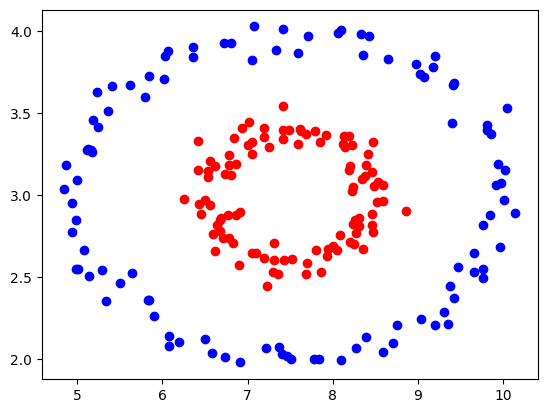

In [5]:
plt.scatter(df['x1'][df['class']==0], df['x2'][df['class']==0] , color='blue')
plt.scatter(df['x1'][df['class']==1], df['x2'][df['class']==1] , color='red')
plt.show()

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max(axis = 0) - X.min(axis = 0))

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

In [8]:
X = df[['x1','x2']].values
y = df['class'].values

In [9]:
X, y

(array([[ 9.076,  3.721],
        [ 6.809,  3.93 ],
        [ 8.256,  2.851],
        [ 8.461,  3.145],
        [ 6.783,  3.188],
        [ 6.616,  2.662],
        [ 5.845,  2.36 ],
        [ 6.645,  2.821],
        [ 5.791,  3.601],
        [ 7.488,  3.399],
        [ 7.296,  2.533],
        [ 6.801,  3.127],
        [ 4.988,  2.548],
        [ 6.416,  3.155],
        [ 6.502,  2.973],
        [ 8.005,  2.69 ],
        [ 6.541,  3.114],
        [ 6.034,  3.85 ],
        [ 5.077,  2.665],
        [ 9.852,  3.374],
        [ 5.237,  3.631],
        [ 6.909,  2.901],
        [ 7.251,  3.296],
        [ 7.833,  2.002],
        [ 6.725,  3.931],
        [ 7.92 ,  3.371],
        [ 7.86 ,  2.535],
        [ 6.674,  2.85 ],
        [ 6.201,  2.105],
        [ 8.228,  3.027],
        [ 8.196,  3.157],
        [ 6.578,  2.041],
        [ 8.306,  2.862],
        [ 8.587,  2.964],
        [ 9.765,  2.82 ],
        [ 5.19 ,  3.459],
        [ 9.406,  3.672],
        [ 8.359,  3.855],
        [ 7.

In [12]:
X1 = min_max_scale(X)
X1 = add_bias(X1)

In [13]:
X1

array([[1.        , 1.34044965, 0.84919473],
       [1.        , 0.91214812, 0.95119571],
       [1.        , 1.18552806, 0.42459736],
       [1.        , 1.22425845, 0.56808199],
       [1.        , 0.90723597, 0.58906784],
       [1.        , 0.87568487, 0.33235725],
       [1.        , 0.73002078, 0.18496828],
       [1.        , 0.8811638 , 0.40995608],
       [1.        , 0.71981863, 0.79062958],
       [1.        , 1.04043076, 0.6920449 ],
       [1.        , 1.00415643, 0.26939971],
       [1.        , 0.91063669, 0.55929722],
       [1.        , 0.56810882, 0.27672035],
       [1.        , 0.83789911, 0.57296242],
       [1.        , 0.85414699, 0.4841386 ],
       [1.        , 1.13810693, 0.34602245],
       [1.        , 0.86151521, 0.55295266],
       [1.        , 0.76572832, 0.91215227],
       [1.        , 0.58492348, 0.33382138],
       [1.        , 1.48705838, 0.67984383],
       [1.        , 0.61515209, 0.80527086],
       [1.        , 0.931041  , 0.44899951],
       [1.

In [14]:
x1 = df['x1'].values
x2 = df['x2'].values

X2_raw = np.column_stack([x1, x2, x1**2, x2**2])
X2 = min_max_scale(X2_raw)
X2 = add_bias(X2)

In [15]:
X2

array([[1.        , 1.34044965, 0.84919473, 1.01344556, 0.9633259 ],
       [1.        , 0.91214812, 0.95119571, 0.5594808 , 1.09315612],
       [1.        , 1.18552806, 0.42459736, 0.83428355, 0.49910133],
       [1.        , 1.22425845, 0.56808199, 0.87748473, 0.6422279 ],
       [1.        , 0.90723597, 0.58906784, 0.55502588, 0.66433793],
       [1.        , 0.87568487, 0.33235725, 0.52681788, 0.41450313],
       [1.        , 0.73002078, 0.18496828, 0.40570491, 0.29136432],
       [1.        , 0.8811638 , 0.40995608, 0.53166583, 0.48528576],
       [1.        , 0.71981863, 0.79062958, 0.39778389, 0.89198768],
       [1.        , 1.04043076, 0.6920449 , 0.68185732, 0.7771827 ],
       [1.        , 1.00415643, 0.26939971, 0.64607433, 0.36009215],
       [1.        , 0.91063669, 0.55929722, 0.55810824, 0.63306169],
       [1.        , 0.56810882, 0.27672035, 0.28867066, 0.36628017],
       [1.        , 0.83789911, 0.57296242, 0.49396114, 0.64734298],
       [1.        , 0.85414699, 0.

# Logistic Regression (Scratch Implementation)

Let the training dataset be:  
$$
\{ (\mathbf{x}^{(i)}, y^{(i)}) \}_{i=1}^{n}, \quad
\mathbf{x}^{(i)} \in \mathbb{R}^m, \; y^{(i)} \in \{0,1\}
$$



## 1. Sigmoid Function

For any input $z$:  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad
z = X \theta
$$

> **Note:** In code, `np.clip` ensures numerical stability: $z$ is bounded.



## 2. Hypothesis / Predicted Probabilities

$$
\hat{\mathbf{y}} = h_\theta(X) = \sigma(X \theta)
$$



## 3. Loss Function (Binary Cross-Entropy / Log Loss)

For $n$ samples:
$$
J(\theta) = - \frac{1}{n} \sum_{i=1}^{n} \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]
$$

> **Note:** In code, `y_hat` is clipped to avoid $\log(0)$.



## 4. Gradient of Loss

Gradient w.r.t parameters $\theta$:  
$$
\nabla_\theta J(\theta) = \frac{1}{n} X^\top (\hat{\mathbf{y}} - \mathbf{y})
$$



## 5. Gradient Descent Update

For each epoch:  
$$
\theta \leftarrow \theta - \alpha \, \nabla_\theta J(\theta)
$$

Where $\alpha$ is the learning rate (`learning_rate` in code).



## 6. Predictions

**Predicted probabilities:**  
$$
\hat{\mathbf{y}} = \sigma(X \theta)
$$

**Binary predictions:**  
$$
\hat{y}^{(i)}_{\text{class}} =
\begin{cases} 
1 & \text{if } \hat{y}^{(i)} \geq 0.5 \\
0 & \text{if } \hat{y}^{(i)} < 0.5
\end{cases}
$$



## 7. Accuracy

$$
\text{Accuracy} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{1}\{\hat{y}^{(i)}_{\text{class}} = y^{(i)}\} \times 100\%
$$

Where $\mathbf{1}\{\cdot\}$ is the indicator function.

In [22]:
class LogisticRegression:

    def __init__(self, learning_rate=0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def loss(self,y,y_hat):
        eps = 1e-15
        y_hat = np.clip(y_hat, eps, 1 - eps)
        return -np.mean(y* np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def fit(self, X, y):
        m,n = X.shape
        self.theta = np.zeros((n,1))
        y = y.reshape(-1,1)

        for epoch in range(self.epochs):
            z = X @ self.theta
            y_hat = self.sigmoid(z)

            gradient  = (1/m) * (X.T @ (y_hat-y))
            self.theta -= self.learning_rate * gradient

            if epoch % 1000 == 0:
                cost = self.loss(y, y_hat)
                self.loss_history.append(cost)
                print(f"Epoch {epoch}: Loss = {cost:.4f}")

    def predict_proba(self, X):
        return self.sigmoid(X @ self.theta)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def accuracy(self, X, y):
        pred = self.predict(X)
        return np.mean(pred.flatten() == y.flatten())*100

In [24]:
model1 = LogisticRegression(learning_rate=0.1, epochs=20000)
model1.fit(X1, y)

print("Intercept:", model1.theta[0])
print("Coefficients:", model1.theta[1:].flatten())
print("Accuracy:", model1.accuracy(X1, y), "%")


Epoch 0: Loss = 0.6931
Epoch 1000: Loss = 0.6930
Epoch 2000: Loss = 0.6930
Epoch 3000: Loss = 0.6930
Epoch 4000: Loss = 0.6930
Epoch 5000: Loss = 0.6930
Epoch 6000: Loss = 0.6930
Epoch 7000: Loss = 0.6930
Epoch 8000: Loss = 0.6930
Epoch 9000: Loss = 0.6930
Epoch 10000: Loss = 0.6930
Epoch 11000: Loss = 0.6930
Epoch 12000: Loss = 0.6930
Epoch 13000: Loss = 0.6930
Epoch 14000: Loss = 0.6930
Epoch 15000: Loss = 0.6930
Epoch 16000: Loss = 0.6930
Epoch 17000: Loss = 0.6930
Epoch 18000: Loss = 0.6930
Epoch 19000: Loss = 0.6930
Intercept: [-0.15593516]
Coefficients: [0.12266411 0.05697001]
Accuracy: 51.5 %


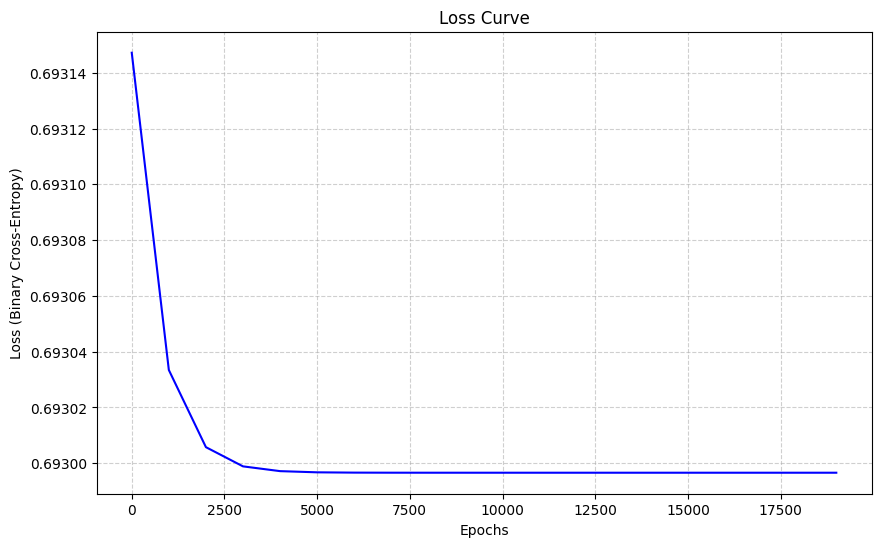

In [25]:
loss_history = model1.loss_history
epochs_range = range(0, model1.epochs, 1000)

#plotting 
plt.figure (figsize=(10,6))
plt.plot(epochs_range, loss_history, linestyle='-', color='blue')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

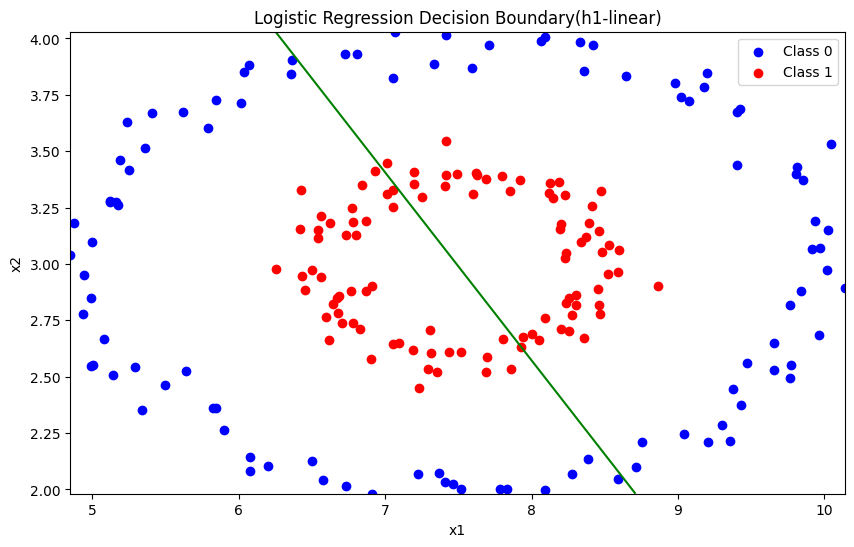

In [32]:
#Decision Boundary
x1_vals = np.linspace(df['x1'].min(), df['x1'].max(), 200)
x2_vals = np.linspace(df['x2'].min(), df['x2'].max(), 200)

xx1, xx2 = np.meshgrid(x1_vals, x2_vals)
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
grid_scaled = min_max_scale(grid_points)
grid_scaled = add_bias(grid_scaled)


#predict probabilities 
Z = model1.predict_proba(grid_scaled)
Z = Z.reshape(xx1.shape)

#plotting 
plt.figure(figsize=(10,6))
plt.scatter(df['x1'][df['class']==0], df['x2'][df['class']==0], color='blue', label='Class 0')
plt.scatter(df['x1'][df['class']==1], df['x2'][df['class']==1], color='red', label='Class 1')

#decision boundary
plt.contour(xx1, xx2, Z, levels=[0.5], colors='green')
plt.title('Logistic Regression Decision Boundary(h1-linear)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [27]:
model2 = LogisticRegression(learning_rate=0.1, epochs=20000)
model2.fit(X2, y)

print("Intercept:", model2.theta[0])
print("Coefficients:", model2.theta[1:].flatten())
print("Accuracy:", model2.accuracy(X2, y), "%")

Epoch 0: Loss = 0.6931
Epoch 1000: Loss = 0.6857
Epoch 2000: Loss = 0.6789
Epoch 3000: Loss = 0.6723
Epoch 4000: Loss = 0.6657
Epoch 5000: Loss = 0.6593
Epoch 6000: Loss = 0.6529
Epoch 7000: Loss = 0.6466
Epoch 8000: Loss = 0.6405
Epoch 9000: Loss = 0.6344
Epoch 10000: Loss = 0.6284
Epoch 11000: Loss = 0.6225
Epoch 12000: Loss = 0.6166
Epoch 13000: Loss = 0.6109
Epoch 14000: Loss = 0.6052
Epoch 15000: Loss = 0.5996
Epoch 16000: Loss = 0.5941
Epoch 17000: Loss = 0.5886
Epoch 18000: Loss = 0.5833
Epoch 19000: Loss = 0.5780
Intercept: [-1.52129552]
Coefficients: [ 7.49528468  7.69236511 -7.67091907 -7.9085845 ]
Accuracy: 100.0 %


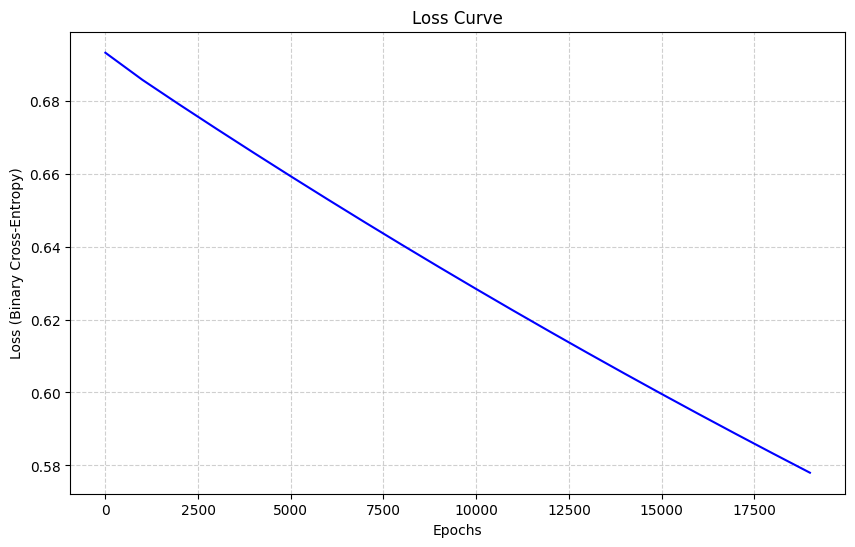

In [28]:
loss_history = model2.loss_history
epochs_range = range(0, model2.epochs, 1000)

#plotting 
plt.figure (figsize=(10,6))
plt.plot(epochs_range, loss_history, linestyle='-', color='blue')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

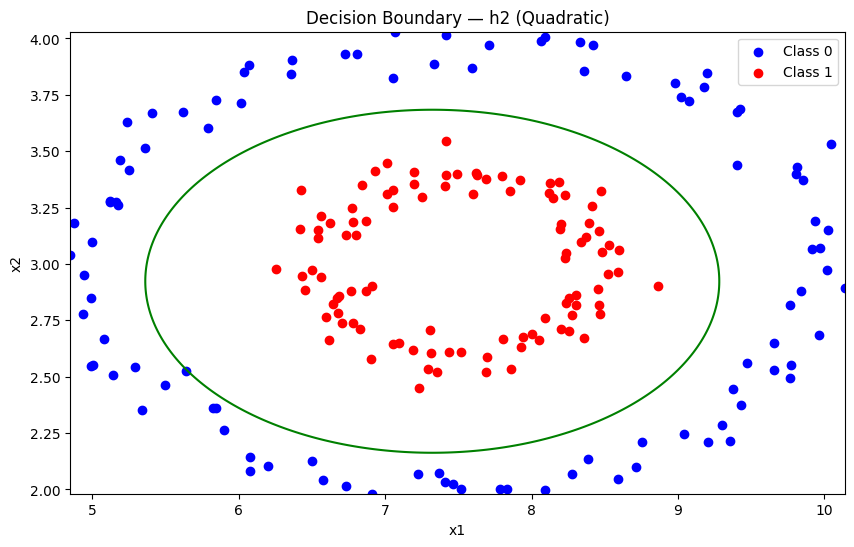

In [31]:
#Decision Boundary

xx1, xx2 = np.meshgrid(x1_vals, x2_vals)

grid_poly = np.c_[xx1.ravel(),
                  xx2.ravel(),
                  xx1.ravel()**2,
                  xx2.ravel()**2]

# Scale polynomial features
grid_poly_scaled = min_max_scale(grid_poly)

# Add bias
grid_poly_scaled = add_bias(grid_poly_scaled)

# Predict probabilities
Z2 = model2.predict_proba(grid_poly_scaled)
Z2 = Z2.reshape(xx1.shape)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df['x1'][y==0], df['x2'][y==0], color='blue', label='Class 0')
plt.scatter(df['x1'][y==1], df['x2'][y==1], color='red', label='Class 1')

# Decision boundary
plt.contour(xx1, xx2, Z2, levels=[0.5], colors='green')

plt.title("Decision Boundary — h2 (Quadratic)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Scikit-learn 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [34]:
X = df[['x1', 'x2']].values
y = df['class'].values

In [36]:
X.shape, y.shape   

((200, 2), (200,))

In [35]:
X, y 

(array([[ 9.076,  3.721],
        [ 6.809,  3.93 ],
        [ 8.256,  2.851],
        [ 8.461,  3.145],
        [ 6.783,  3.188],
        [ 6.616,  2.662],
        [ 5.845,  2.36 ],
        [ 6.645,  2.821],
        [ 5.791,  3.601],
        [ 7.488,  3.399],
        [ 7.296,  2.533],
        [ 6.801,  3.127],
        [ 4.988,  2.548],
        [ 6.416,  3.155],
        [ 6.502,  2.973],
        [ 8.005,  2.69 ],
        [ 6.541,  3.114],
        [ 6.034,  3.85 ],
        [ 5.077,  2.665],
        [ 9.852,  3.374],
        [ 5.237,  3.631],
        [ 6.909,  2.901],
        [ 7.251,  3.296],
        [ 7.833,  2.002],
        [ 6.725,  3.931],
        [ 7.92 ,  3.371],
        [ 7.86 ,  2.535],
        [ 6.674,  2.85 ],
        [ 6.201,  2.105],
        [ 8.228,  3.027],
        [ 8.196,  3.157],
        [ 6.578,  2.041],
        [ 8.306,  2.862],
        [ 8.587,  2.964],
        [ 9.765,  2.82 ],
        [ 5.19 ,  3.459],
        [ 9.406,  3.672],
        [ 8.359,  3.855],
        [ 7.

In [38]:
model_h1 = Pipeline([
    ("scaller", MinMaxScaler()),
    ("logreg", LogisticRegression(
        fit_intercept = True,
        solver = 'lbfgs',
        max_iter = 20000
    ))
])

model_h1.fit(X, y)

Pipeline(steps=[('scaller', MinMaxScaler()),
                ('logreg', LogisticRegression(max_iter=20000))])

In [39]:
print('Intercept', model_h1.named_steps['logreg'].intercept_)
print('Coefficients', model_h1.named_steps['logreg'].coef_)
print('Accuracy', accuracy_score(y, model_h1.predict(X))*100 , '%')

Intercept [-0.06720671]
Coefficients [[0.09533879 0.03972249]]
Accuracy 51.5 %


In [40]:
#model h2 
x1 = df['x1'].values
x2 = df['x2'].values

X2 = np.column_stack([x1, x2, x1**2, x2**2])

In [44]:
model_h2 = Pipeline([
    ("scaller", MinMaxScaler()),
    ("logreg", LogisticRegression(
        penalty=None,
        fit_intercept = True,
        solver = 'lbfgs',
        max_iter = 20000
    ))
])

model_h2.fit(X2, y)

Pipeline(steps=[('scaller', MinMaxScaler()),
                ('logreg', LogisticRegression(max_iter=20000, penalty=None))])

In [45]:
print('Intercept', model_h2.named_steps['logreg'].intercept_)
print('Coefficients', model_h2.named_steps['logreg'].coef_)
print('Accuracy', accuracy_score(y, model_h2.predict(X2))*100 , '%')

Intercept [-33.93576245]
Coefficients [[ 276.94220017  274.75617681 -277.36181815 -278.52530053]]
Accuracy 100.0 %


# Exercise 4

Given the dataset `data_3_2.csv`, build a multiclass (4 class) classification model to fit this data. You can choose your own hypothesis.


In [46]:
# To Do

df = pd.read_csv('data_3_2.csv')
df.head()

,x1,x2,class
0,10.52,0.65,3
1,1.46,-1.25,2
2,1.50,0.56,2
3,-1.36,2.50,0
4,11.16,5.19,1


In [47]:
X = df[['x1', 'x2' ]].values
y = df['class'].values

In [50]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("softmax", LogisticRegression(
        solver = "lbfgs", 
        penalty=None,
        max_iter=5000
    ))
])

model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('softmax', LogisticRegression(max_iter=5000, penalty=None))])

In [51]:
logreg = model.named_steps['softmax']
print("Intercepts:", logreg.intercept_)
print("Coefficients:", logreg.coef_)

Intercepts: [ 14.58940225   5.68432904  20.2353599  -40.50909119]
Coefficients: [[-82.50160378  11.68943846]
 [  3.30995275  64.33157383]
 [-63.15019486 -10.38907761]
 [142.3418459  -65.63193468]]


In [52]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)*100
print("Accuracy:", accuracy, "%")

Accuracy: 99.0 %


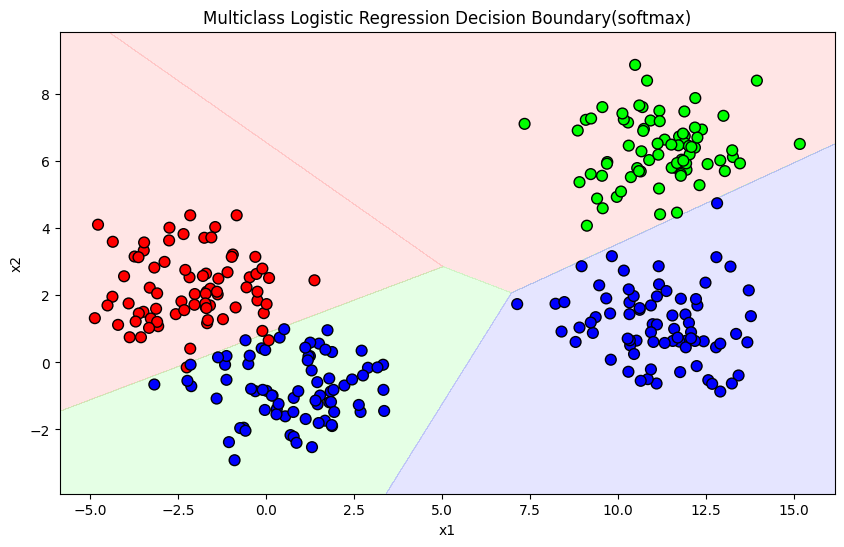

In [55]:
#Decision Boundary 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Extract min and max for each feature to define the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#create meshgrid 
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

#flattten grid and predict class labels for each point

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#define color map for each class 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#plot the decision boundary 
plt.figure(figsize =(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

#plot original data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s= 60)
plt.title('Multiclass Logistic Regression Decision Boundary(softmax)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Exercise 5: Mini Project 01

With your team, collect your own dataset which consists at least two features and one target variable.

Build a linear regression model to predict the target variable. Split your dataset into training set (80%) and testing set (20%).


In [ ]:
# To Do


# Exercise 6: Mini Project 02

With your team, collect your own dataset which consists at least two features and one target variable.

Build a logistic regression model to predict the target variable. Split your dataset into training set (80%) and testing set (20%). Present your model to the class next week!


In [ ]:
# To Do
